<a href="https://colab.research.google.com/github/SherilMariaShaji/Anomaly-Detection-using-Gaussian-model/blob/main/Anomaly_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing Libraries

In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf


import matplotlib.pyplot as plt
from matplotlib.pylab import rcParams
import plotly.graph_objects as go
import seaborn as sns
%matplotlib inline
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

sns.set(style='whitegrid', palette='muted')
rcParams['figure.figsize'] = 14, 8
np.random.seed(1)
tf.random.set_seed(1)

In [ ]:
df = pd.read_csv("/content/VST.csv")

In [ ]:
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2016-11-07,14.100000,14.250000,14.100000,14.100000,11.138925,2300
1,2016-11-08,14.000000,14.250000,13.900000,14.200000,11.217926,335100
2,2016-11-09,13.900000,14.150000,13.900000,14.050000,11.099426,106300
3,2016-11-10,14.100000,14.230000,14.100000,14.230000,11.241625,2629000
4,2016-11-11,14.400000,14.900000,14.400000,14.710000,11.620823,13400
...,...,...,...,...,...,...,...
1283,2021-12-13,20.770000,21.014999,20.680000,20.730000,20.580288,3952700
1284,2021-12-14,20.674999,21.120001,20.670000,20.770000,20.620001,4358100
1285,2021-12-15,20.719999,20.809999,20.434999,20.700001,20.700001,4531000
1286,2021-12-16,20.700001,21.225000,20.650000,20.930000,20.930000,3057900


# EDA

In [ ]:
df.replace(to_replace = '-',value =np.NaN,inplace = True)

In [ ]:
df = df.dropna()

In [ ]:
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2016-11-07,14.100000,14.250000,14.100000,14.100000,11.138925,2300
1,2016-11-08,14.000000,14.250000,13.900000,14.200000,11.217926,335100
2,2016-11-09,13.900000,14.150000,13.900000,14.050000,11.099426,106300
3,2016-11-10,14.100000,14.230000,14.100000,14.230000,11.241625,2629000
4,2016-11-11,14.400000,14.900000,14.400000,14.710000,11.620823,13400
...,...,...,...,...,...,...,...
1283,2021-12-13,20.770000,21.014999,20.680000,20.730000,20.580288,3952700
1284,2021-12-14,20.674999,21.120001,20.670000,20.770000,20.620001,4358100
1285,2021-12-15,20.719999,20.809999,20.434999,20.700001,20.700001,4531000
1286,2021-12-16,20.700001,21.225000,20.650000,20.930000,20.930000,3057900


In [ ]:
df.index = np.arange(1, len(df) + 1)


In [ ]:
df.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [ ]:
df.dtypes

Date          object
Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume         int64
dtype: object

In [ ]:
df['Date'].astype(str)

1       2016-11-07
2       2016-11-08
3       2016-11-09
4       2016-11-10
5       2016-11-11
           ...    
1284    2021-12-13
1285    2021-12-14
1286    2021-12-15
1287    2021-12-16
1288    2021-12-17
Name: Date, Length: 1288, dtype: object

In [ ]:
df['Date'] =pd.to_datetime(df.Date)

In [ ]:
df

,Date,Open,High,Low,Close,Adj Close,Volume
1,2016-11-07,14.100000,14.250000,14.100000,14.100000,11.138925,2300
2,2016-11-08,14.000000,14.250000,13.900000,14.200000,11.217926,335100
3,2016-11-09,13.900000,14.150000,13.900000,14.050000,11.099426,106300
4,2016-11-10,14.100000,14.230000,14.100000,14.230000,11.241625,2629000
5,2016-11-11,14.400000,14.900000,14.400000,14.710000,11.620823,13400
...,...,...,...,...,...,...,...
1284,2021-12-13,20.770000,21.014999,20.680000,20.730000,20.580288,3952700
1285,2021-12-14,20.674999,21.120001,20.670000,20.770000,20.620001,4358100
1286,2021-12-15,20.719999,20.809999,20.434999,20.700001,20.700001,4531000
1287,2021-12-16,20.700001,21.225000,20.650000,20.930000,20.930000,3057900


# Visualisations 

Text(0.5, 1.0, 'Sales Data')

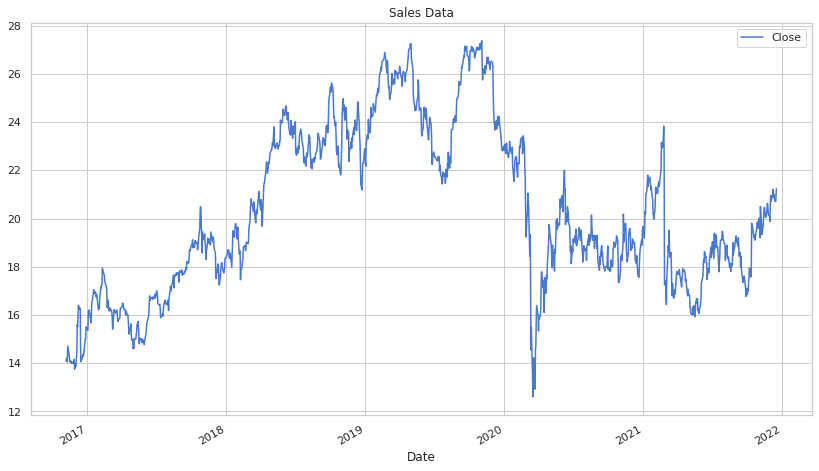

In [ ]:
df.sort_values('Date')
df.plot(x='Date',y='Close')

plt.title('Sales Data')

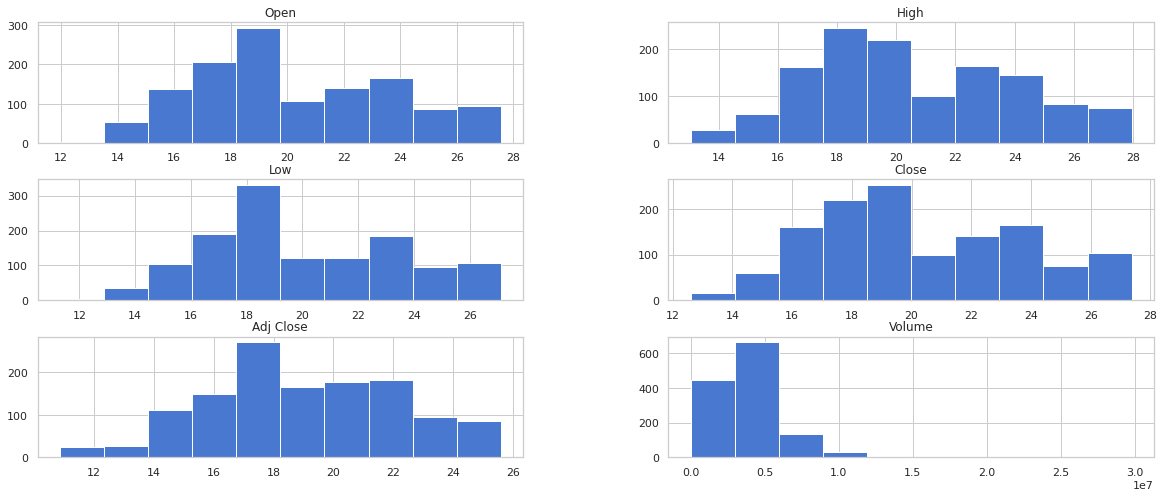

In [ ]:
plt.rcParams["figure.figsize"] = (20,8)
hist = df[["Open","High","Low","Close","Adj Close" ,"Volume"]].hist(bins=10)

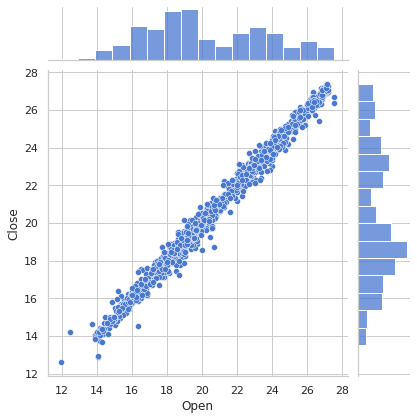

In [ ]:
sns.jointplot(x = "Open",y ="Close" ,data = df)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



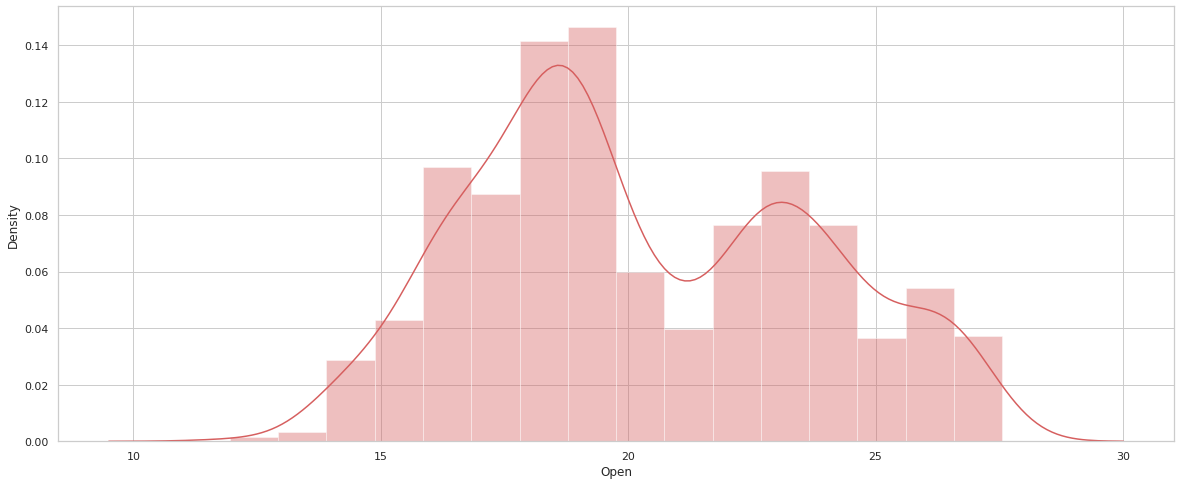

In [ ]:
sns.distplot(df["Open"],color = 'r')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



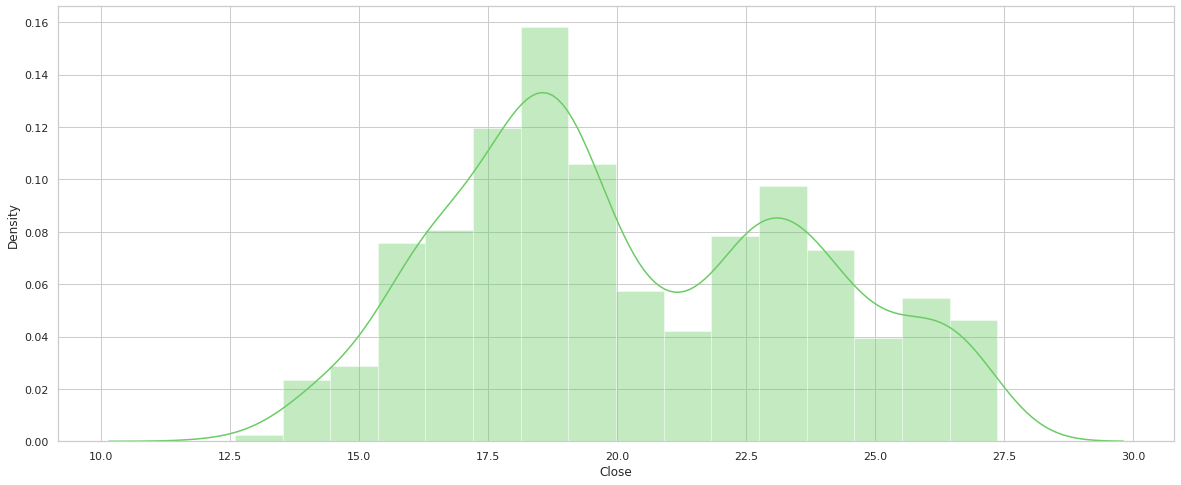

In [ ]:
sns.distplot(df["Close"],color = 'g')

In [ ]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=df.Date, y=df.Close,
                    mode='lines',
                    name='close'))
fig.update_layout(showlegend=True)
fig.show()

In [ ]:
variables = ['Open','High','Low','Close','Adj Close','Volume']

In [ ]:
x = df.loc[:, variables].values

In [ ]:
x = StandardScaler().fit_transform(x)

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)

In [ ]:
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])

In [ ]:
principalDf

,principal component 1,principal component 2
0,4.468581,-1.007219
1,4.469029,-0.878038
2,4.541097,-0.957880
3,4.324545,-0.020927
4,4.159068,-1.036815
...,...,...
1283,-0.484277,-0.045942
1284,-0.512795,0.106299
1285,-0.457311,0.180332
1286,-0.533831,-0.389706


In [ ]:
finalDf = pd.concat([df[['Date']],principalDf], axis = 1)

In [ ]:
finalDf

,Date,principal component 1,principal component 2
0,NaT,4.468581,-1.007219
1,2016-11-07,4.469029,-0.878038
2,2016-11-08,4.541097,-0.957880
3,2016-11-09,4.324545,-0.020927
4,2016-11-10,4.159068,-1.036815
...,...,...,...
1284,2021-12-13,-0.512795,0.106299
1285,2021-12-14,-0.457311,0.180332
1286,2021-12-15,-0.533831,-0.389706
1287,2021-12-16,-0.686389,-0.103901


In [ ]:
finalDf.dropna(inplace=True)

In [ ]:
finalDf.loc[-1:]

,Date,principal component 1,principal component 2
1,2016-11-07,4.469029,-0.878038
2,2016-11-08,4.541097,-0.957880
3,2016-11-09,4.324545,-0.020927
4,2016-11-10,4.159068,-1.036815
5,2016-11-11,4.183209,-0.993704
...,...,...,...
1283,2021-12-10,-0.484277,-0.045942
1284,2021-12-13,-0.512795,0.106299
1285,2021-12-14,-0.457311,0.180332
1286,2021-12-15,-0.533831,-0.389706


In [ ]:
from sklearn.mixture import GaussianMixture
from numpy import quantile, where, random

In [ ]:
var = ['principal component 1','principal component 2']

In [ ]:
y = finalDf.loc[:,var].values

In [ ]:
y

array([[ 4.46902912, -0.87803798],
       [ 4.54109746, -0.95788021],
       [ 4.32454535, -0.02092683],
       ...,
       [-0.45731141,  0.18033177],
       [-0.53383142, -0.3897057 ],
       [-0.68638874, -0.10390133]])

In [ ]:
#define the model by using the GaussianMixture class of Scikit-learn API
#define the class with a default value
gausMix = GaussianMixture().fit(y)


In [ ]:
#compute the weighted log probabilities for each sample with a score_sample() method
scores = gausMix.score_samples(y)

In [ ]:
scores

array([-5.02415735, -5.16679956, -4.48694007, ..., -2.65388528,
       -2.72466252, -2.66854187])

In [ ]:
#extract the threshold values from the scores data by using quantile() function.
thresh = quantile(scores, .03)
print(thresh) 

-5.3158701130876995


In [ ]:
#Based on the extracted threshold value, we'll find the samples with the scores that are equal to or lower than the threshold value
index = where(scores <= thresh)
values = y[index]

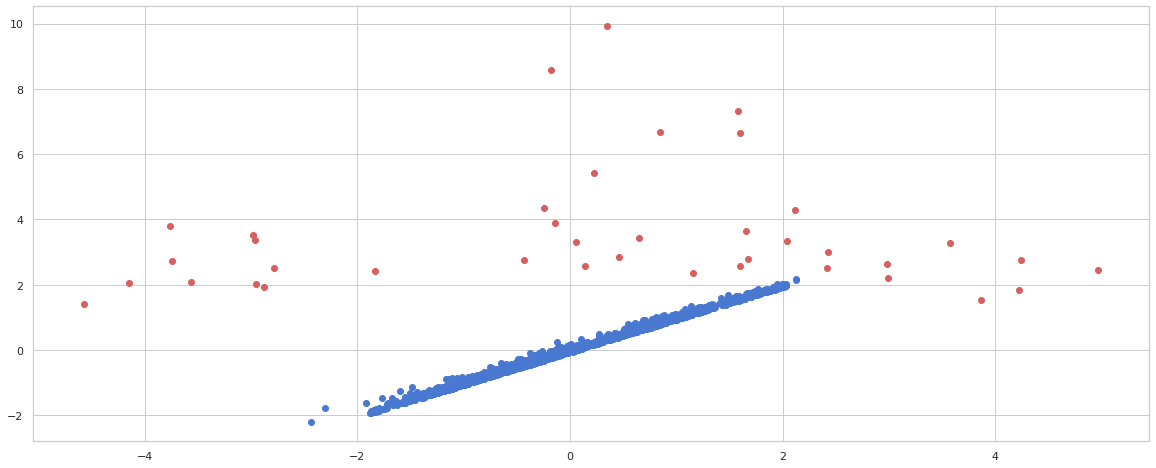

In [ ]:
#we'll visualize the results in a plot by highlighting the anomalies with a color.
plt.scatter(x[:,0], x[:,1])
plt.scatter(values[:,0], values[:,1], color='r')
plt.show()
